# 1. Prediction (Cacade_rcnn, Yolov8)

In [15]:
import pandas as pd
import re

# CSV 파일 경로 설정
csv_file_path_list = ['\\Users\\user\\level2-objectdetection-cv-24\\submission_correlation_cascade.csv',
                 '\\Users\\user\\level2-objectdetection-cv-24\\submission_correlation_yolov8.csv']

classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

def make_df(csv_file_path):
    df = pd.read_csv(csv_file_path)
    rows = []

    # 각 이미지에 대한 bbox 정보 파싱
    for index, row in df.iterrows():
        # PredictionString이 NaN이 아닐 경우에만 처리
        if pd.notna(row['PredictionString']):
            predictions = row['PredictionString'].strip().split(' ')
            image_id = row['image_id']

            # 각 bbox를 추출하여 행 추가
            for i in range(0, len(predictions), 6):
                if i + 5 < len(predictions):
                    class_id = int(predictions[i])
                    class_name = classes[class_id]
                    confidence = float(predictions[i + 1])
                    x1 = float(predictions[i + 2])
                    y1 = float(predictions[i + 3])
                    x2 = float(predictions[i + 4])
                    y2 = float(predictions[i + 5])
                    rows.append([image_id, class_id, class_name, confidence, x1, x2, y1, y2])

    # 새로운 DataFrame 생성
    columns = ['image_id', 'class_id', 'class_name', 'confidence', 'x_min', 'y_min', 'x_max', 'y_max']
    csv_file_path__pred = pd.DataFrame(rows, columns=columns)

    # 결과 출력
    return csv_file_path__pred


cascade_bbox_pred = make_df(csv_file_path_list[0])
yolov8_bbox_pred = make_df(csv_file_path_list[1])

In [16]:
cascade_bbox_pred

,image_id,class_id,class_name,confidence,x_min,y_min,x_max,y_max
0,train/0000.jpg,0,General trash,0.9974,199.06,744.20,188.81,669.11
1,train/0001.jpg,4,Glass,0.9994,714.34,991.29,309.65,579.90
2,train/0001.jpg,5,Plastic,0.9597,8.54,791.01,447.91,697.43
3,train/0001.jpg,0,General trash,0.9046,426.21,636.12,681.17,859.49
4,train/0001.jpg,7,Plastic bag,0.8997,4.67,155.18,444.67,647.54
...,...,...,...,...,...,...,...,...
54736,train/4882.jpg,7,Plastic bag,0.4588,256.66,583.10,443.75,664.41
54737,train/4882.jpg,7,Plastic bag,0.2176,367.15,550.33,537.25,660.33
54738,train/4882.jpg,1,Paper,0.1117,256.66,583.10,443.75,664.41
54739,train/4882.jpg,1,Paper,0.0793,253.03,540.89,544.66,637.10


In [34]:
print(yolov8_bbox_pred)

             image_id  class_id     class_name  confidence   x_min    y_min  \
0      train/0000.jpg         0  General trash      0.8816  189.02   757.79   
1      train/0001.jpg         5        Plastic      0.4576    5.03   794.16   
2      train/0001.jpg         7    Plastic bag      0.4555   90.83   232.75   
3      train/0001.jpg         4          Glass      0.4441  721.31  1004.69   
4      train/0001.jpg         5        Plastic      0.3800  353.04   590.93   
...               ...       ...            ...         ...     ...      ...   
38669  train/4882.jpg         6      Styrofoam      0.1660  123.80   974.90   
38670  train/4882.jpg         0  General trash      0.1045  509.26   571.53   
38671  train/4882.jpg         0  General trash      0.0948   90.50   972.93   
38672  train/4882.jpg         1          Paper      0.0776    0.00   870.42   
38673  train/4882.jpg         9       Clothing      0.0510  123.80   974.90   

        x_max   y_max  
0      180.95  677.31  
1  

In [20]:
# test 파일 개수 확인 = 4871
print(f'cascade bbox num = {len(cascade_bbox_pred)}')
print(f'yolov8 bbox num = {len(yolov8_bbox_pred)}')

cascade bbox num = 54741
yolov8 bbox num = 38674


# 2. Ground_truth

In [23]:
import pandas as pd
from pycocotools.coco import COCO

# COCO 데이터셋 로드
coco = COCO('../dataset/train.json')

# 데이터프레임 초기화
data = {
    "image_id": [],
    "class_name": [],
    "class_id": [],
    'id': [],
    "x_min": [],
    "y_min": [],
    "x_max": [],
    "y_max": []
}

classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

for image_id in coco.getImgIds():
    image_info = coco.loadImgs(image_id)[0]
    ann_ids = coco.getAnnIds(imgIds=image_info['id'])
    anns = coco.loadAnns(ann_ids)
    
    file_name = image_info['file_name']
    
    for ann in anns:
        data["image_id"].append(file_name)
        data["class_name"].append(classes[ann['category_id']])
        data["class_id"].append(ann['category_id'])
        data['id'].append(ann['id'])
        data["x_min"].append(float(ann['bbox'][0]))
        data["y_min"].append(float(ann['bbox'][1]))
        data["x_max"].append(float(ann['bbox'][0]) + float(ann['bbox'][2]))
        data["y_max"].append(float(ann['bbox'][1]) + float(ann['bbox'][3]))

# 데이터프레임에 데이터 추가
train_df = pd.DataFrame(data)

loading annotations into memory...
Done (t=0.19s)
creating index...
index created!


In [24]:
train_df

,image_id,class_name,class_id,id,x_min,y_min,x_max,y_max
0,train/0000.jpg,General trash,0,0,197.6,193.7,745.4,663.4
1,train/0001.jpg,Metal,3,1,0.0,407.4,57.6,588.0
2,train/0001.jpg,Plastic bag,7,2,0.0,455.6,144.6,637.2
3,train/0001.jpg,Glass,4,3,722.3,313.4,996.6,565.3
4,train/0001.jpg,Plastic,5,4,353.2,671.0,586.9,774.4
...,...,...,...,...,...,...,...,...
23139,train/4882.jpg,Plastic,5,23139,0.0,116.2,944.1,930.3
23140,train/4882.jpg,Plastic bag,7,23140,302.1,439.3,567.3,655.4
23141,train/4882.jpg,General trash,0,23141,511.3,451.1,570.0,481.3
23142,train/4882.jpg,Paper,1,23142,255.0,421.4,526.7,616.5


# 3. Sampling

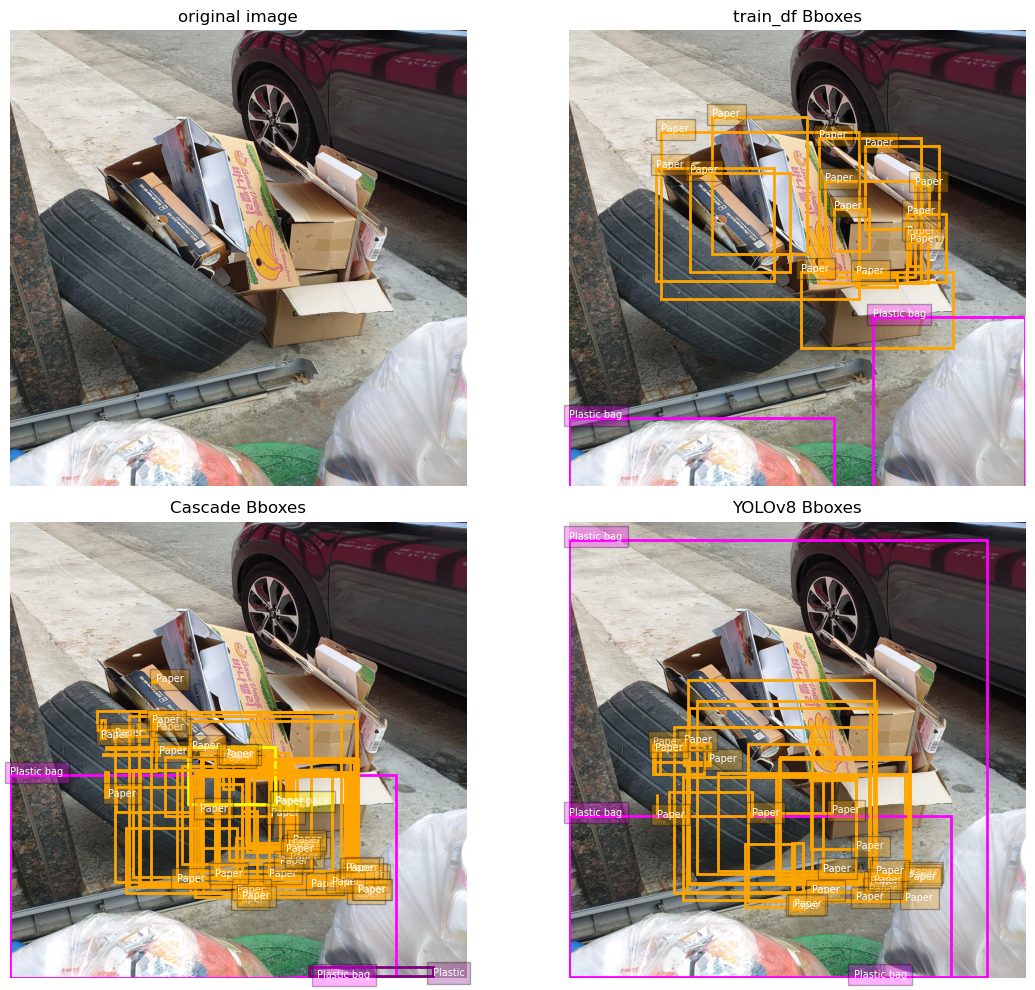

Image ID: train/0977.jpg
train_df Bbox 개수: 16
Cascade Bbox 개수: 44
YOLOv8 Bbox 개수: 24


In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random
import os

# 데이터셋 경로 설정
BASE_DIR = 'C:\\Users\\user\\level2-objectdetection-cv-24\\dataset'

# 바운딩 박스 색상 설정 (클래스명에 따라)
class_colors = {
    "General trash": "red", 
    "Paper": "orange", 
    "Paper pack": "yellow", 
    "Metal": "green", 
    "Glass": "blue", 
    "Plastic": "purple", 
    "Styrofoam": "cyan", 
    "Plastic bag": "magenta", 
    "Battery": "pink", 
    "Clothing": "brown"
}

# 샘플 이미지를 바운딩 박스와 함께 표시하는 함수
def plot_bboxes(ax, img, bbox, title):
    ax.imshow(img)
    ax.axis('off')
    
    # Bbox 그리기
    for _bbox_info in bbox:
        x, y, w, h, class_name = _bbox_info
        color = class_colors.get(class_name, 'yellow')  # 기본 색상은 노란색
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, class_name, fontsize=7, color='white', bbox=dict(facecolor=color, alpha=0.3))

    ax.set_title(title)

# bbox anchor을 coco 형태로 재구성
def bbox_anchor(Dataframe):
    bbox_anchor_info = [
        Dataframe['x_min'].values,
        Dataframe['y_min'].values,
        (Dataframe['x_max'] - Dataframe['x_min']).values,
        (Dataframe['y_max'] - Dataframe['y_min']).values
    ]
    
    return bbox_anchor_info

# 데이터셋에서 랜덤하게 샘플 선택
sample_index = random.randint(0, len(train_df) - 1)
sample_row = train_df.iloc[sample_index]

# 이미지 경로와 Bbox 정보 추출
image_path = os.path.join(BASE_DIR, sample_row['image_id'])
img = Image.open(image_path)

# 각 Bbox 정보 추출
sample_img_df = train_df[train_df['image_id'] == sample_row['image_id']]
train_bbox_set = []

for idx in range(len(sample_img_df)):
    bbox_info = bbox_anchor(sample_img_df.iloc[[idx]])
    class_name = sample_img_df.iloc[idx]['class_name']
    train_bbox_set.append((bbox_info[0][0], bbox_info[1][0], bbox_info[2][0], bbox_info[3][0], class_name))

# YOLOv8 예측 바운딩 박스 추출
yolov8_bbox_set = []
yolov8_predictions = yolov8_bbox_pred[yolov8_bbox_pred['image_id'] == sample_row['image_id']]

for idx in range(len(yolov8_predictions)):
    row = yolov8_predictions.iloc[idx]
    x_min = row['x_min']
    y_min = row['y_min']
    w = row['x_max'] - row['x_min']
    h = row['y_max'] - row['y_min']
    class_name = row['class_name']
    yolov8_bbox_set.append((x_min, y_min, w, h, class_name))

# Cascade 예측 바운딩 박스 추출
cascade_bbox_set = []
cascade_predictions = cascade_bbox_pred[cascade_bbox_pred['image_id'] == sample_row['image_id']]

for idx in range(len(cascade_predictions)):
    row = cascade_predictions.iloc[idx]
    x_min = row['x_min']
    y_min = row['y_min']
    w = row['x_max'] - row['x_min']
    h = row['y_max'] - row['y_min']
    class_name = row['class_name']
    cascade_bbox_set.append((x_min, y_min, w, h, class_name))

# 2x2 플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 원본 이미지
plot_bboxes(axs[0, 0], img, [], "original image")

# train_df의 bbox
plot_bboxes(axs[0, 1], img, train_bbox_set, "train_df Bboxes")

# Cascade의 예측 bbox
plot_bboxes(axs[1, 0], img, cascade_bbox_set, "Cascade Bboxes")

# YOLOv8의 예측 bbox
plot_bboxes(axs[1, 1], img, yolov8_bbox_set, "YOLOv8 Bboxes")

plt.tight_layout()
plt.show()

print(f"Image ID: {sample_row['image_id']}")
print(f"train_df Bbox 개수: {len(train_bbox_set)}")
print(f"Cascade Bbox 개수: {len(cascade_bbox_set)}")
print(f"YOLOv8 Bbox 개수: {len(yolov8_bbox_set)}")
